# Assignment 5 on MLflow
**Note**: It is recommended to use a virtual environment to run the same. Requirements can be found in the `requirements.txt` file. <br>
**Tip**: Refer to the [following blog](https://anbasile.github.io/posts/2017-06-25-jupyter-venv/) to learn more about using virtual environments and corresponding kernels in VSCode

In [1]:
# !pip install plot_keras_history
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from plot_keras_history import show_history

## Getting the data

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

(60000, 784) train input samples
(10000, 784) test input samples


In [3]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


## Run a simple model to check if Keras is working properly

In [4]:
# let's try a basic neural network for digit classification
model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

c:\Users\Admin\OneDrive - smail.iitm.ac.in\Stdy\Sem 10\CS5830 Big Data Lab\A05_MLFlow\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6058 - loss: 1.4965 - val_accuracy: 0.8874 - val_loss: 0.4483
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8962 - loss: 0.3958 - val_accuracy: 0.9170 - val_loss: 0.2879
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9222 - loss: 0.2726 - val_accuracy: 0.9289 - val_loss: 0.2423


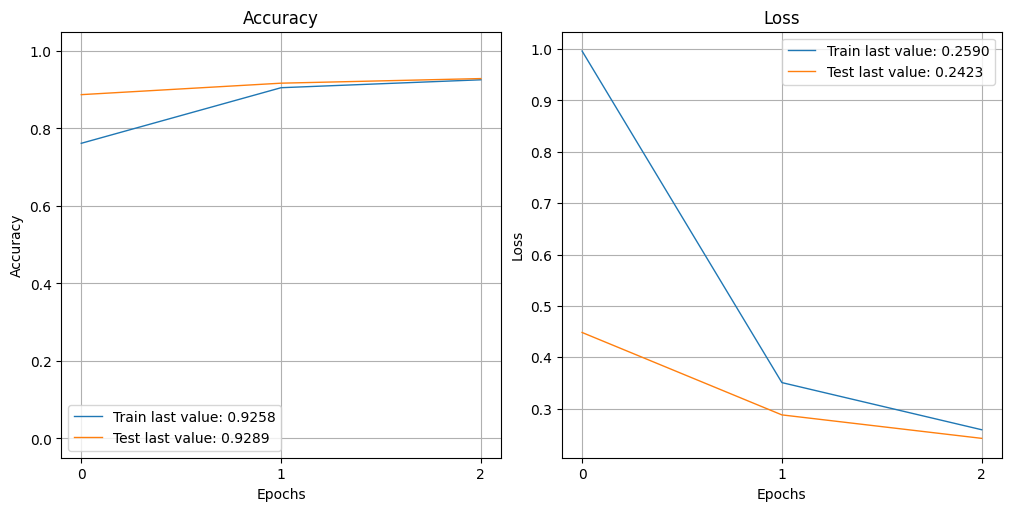

In [6]:
show_history(history)

In [7]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - 3ms/step - accuracy: 0.9289 - loss: 0.2423
Test accuracy: 92.89%
1875/1875 - 5s - 3ms/step - accuracy: 0.9331 - loss: 0.2315
Train accuracy: 93.31%


In [8]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Predicted Digit: 3


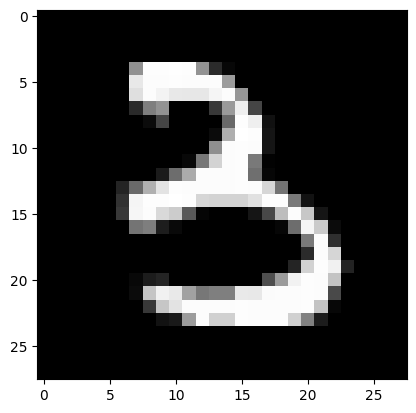

In [9]:
# check if the prediction is working fine for a random test point
test_pt = 782
plt.imshow(X_test[test_pt], cmap=plt.get_cmap('gray'))
probs = model.predict(x_test[test_pt:test_pt+1], verbose=True)
print("Predicted Digit:", np.argmax(probs))

# Define all the experiment variants

In [59]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py


class define_expt_variants:
    """
    Class which holds all the 10 required experimental variants
    Each variant differs by a minor configuation such as learning rates, model size, batch size etc.
    Each class method fits the model on the data and captures the history. However, the history is not returned
    """
    def __init__(self):
        pass

    def cfg_basic(self):
        """basic neural network for digit classification"""
        model_1 = keras.Sequential()
        model_1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_1.add(layers.Dense(20, activation='sigmoid'))
        model_1.add(layers.Dense(10, activation='softmax'))

        model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        return model_1
    
    def cfg_bigger(self):
        """bigger model"""
        model_2 = keras.Sequential()
        model_2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_2.add(layers.Dense(128, activation='sigmoid'))
        model_2.add(layers.Dense(10, activation='softmax'))

        model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        return model_2
    
    def cfg_regularised(self):
        """regularised model"""
        model_3 = keras.Sequential()
        model_3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)))
        model_3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)))
        model_3.add(layers.Dense(10, activation='softmax'))

        model_3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_3.fit(x_train, y_train, epochs=50, steps_per_epoch=50, validation_data=(x_test, y_test))

        return model_3
    
    def cfg_dropout(self):
        """model with dropout"""
        model_4 = keras.Sequential()
        model_4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_4.add(Dropout(0.7))
        model_4.add(layers.Dense(128, activation='sigmoid'))
        model_4.add(Dropout(0.6))
        model_4.add(layers.Dense(10, activation='softmax'))

        model_4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_4.fit(x_train, y_train, epochs=10)

        return model_4
    
    def cfg_early_stop(self):
        """model with early stopping callback"""
        model_5 = keras.Sequential()
        model_5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_5.add(layers.Dense(128, activation='sigmoid'))
        model_5.add(layers.Dense(10, activation='softmax'))
        model_5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
        # model_ will get saved at the end of every epoch automatically.
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
        history = model_5.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])
        
        return model_5
    

    def cfg_lr_10(self):
        """model with a very high learning rate"""
        model_6 = keras.Sequential()
        model_6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_6.add(layers.Dense(10, activation='sigmoid'))
        model_6.add(layers.Dense(10, activation='softmax'))

        opt_new = keras.optimizers.SGD(learning_rate=10)
        model_6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_6.fit(x_train, y_train, epochs=20)

        return model_6
    
    def cfg_lr_1e_5(self):
        """model with very low learning rate"""
        model_7 = keras.Sequential()
        model_7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_7.add(layers.Dense(10, activation='sigmoid'))
        model_7.add(layers.Dense(10, activation='softmax'))

        opt_new = keras.optimizers.SGD(learning_rate=.00001)
        model_7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_7.fit(x_train, y_train, epochs=20)

        return model_7
    
    def cfg_lr_1e_2(self):
        """model with optimal learning rate"""
        model_8 = keras.Sequential()
        model_8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_8.add(layers.Dense(10, activation='sigmoid'))
        model_8.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=.01)
        model_8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_8.fit(x_train, y_train, epochs=20)

        return model_8
    
    def cfg_lr_momentum(self):
        """model with momentum in the optimizer"""
        model_9 = keras.Sequential()
        model_9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_9.add(layers.Dense(10, activation='sigmoid'))
        model_9.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
        model_9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_9.fit(x_train, y_train, epochs=20)

        return model_9
    
    def cfg_minibatch_sgd(self):
        """Mini-batch SGD - the default minibatch size is 32 unlike 1"""
        model_10 = keras.Sequential()
        model_10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_10.add(layers.Dense(10, activation='sigmoid'))
        model_10.add(layers.Dense(10, activation='softmax'))
        
        opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
        model_10.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_10.fit(x_train, y_train, batch_size=512, epochs=10)

        return model_10


In [60]:
# expts = define_expt_variants()
# model_t= expts.cfg_basic()

# Use MLflow experiments
Run the command `mlflow server` in the terminal if you get a Connection Refused Error

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient

# Set the tracking URI for MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Run the command `mlflow server` in the terminal if you get a connection refused error

# Start the parent experiment
parent_experiment = mlflow.set_experiment("A05 MNIST Experiment")


# we let the run_name to be randomly chosen, so that a new 
# entry is created as the parent experiment (a new row is created with each run of the cell)
# all children experiments are nested
with mlflow.start_run(experiment_id=parent_experiment.experiment_id, 
                    #   run_name="MNIST Parent Run"
                      ):

    # Create an instance of the ModelConfigurations class
    model_configs = define_expt_variants()

    # Get the list of configuration methods from the class
    # all the useful methods were defined such that they start
    # with the string 'cfg'
    config_methods = [getattr(model_configs, method_name) for method_name in dir(model_configs) 
                      if callable(getattr(model_configs, method_name)) 
                      and method_name.startswith('cfg')]

    # config_methods = config_methods[:2]

    # Code for running the 10 model configurations
    for i, config_method in enumerate(config_methods, start=1):

        # name of the nested run is extracted by config_method.__name__
        with mlflow.start_run(run_name=f"MNIST Config {config_method.__name__}", nested=True):
            
            # Print run name
            print(f'run name = {config_method.__name__}')

            # autologging - we use it to log other params 
            # which we aren't manually logging
            mlflow.autolog()
            
            # the method is defined such that it fits the model on the data
            model = config_method()

            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
            train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)

            # Assemble the metrics and log to mlflow
            metrics = {
              "test_loss": test_loss, 
              "test_acc": test_acc, 
              "train_loss": train_loss, 
              "train_acc": train_acc
            }            
            mlflow.log_metrics(metrics)
            print(f'metrics are {metrics}')

            # Assemble the parameters and log to mlflow
            params = {
              'lr_mlflow_param_custom': model.optimizer.learning_rate.numpy(),
              'momentum_mlflow_param_custom': model.optimizer.momentum, 
              'optimiser_param_custom': model.optimizer.__class__.__name__
            } 
            mlflow.log_params(params)
            print(f'params are {params}')

## Search through Nested Runs

In [87]:

# Get the experiment ID of the parent experiment
experiment_id = parent_experiment.experiment_id

# Get the MlflowClient
client = MlflowClient()

# Get the child runs from the parent run
child_runs = client.search_runs(experiment_ids = experiment_id)

# Show only two child runs and only some metrics/params for example purpose
child_runs = child_runs[:2]
for child_run in child_runs:
    print(f"Child Run Name: {child_run.data.tags.get('mlflow.runName')}")
    print(f"\t ID: {child_run.info.run_id}")
    print(f"\t loss = {child_run.data.metrics['loss']}, epochs = {child_run.data.params['epochs']}")

Child Run Name: MNIST Config cfg_bigger
	 ID: 23f893f71ed14dcead1cd5e97ee065b8
	 loss = 0.17414022982120514, epochs = 2
Child Run Name: MNIST Config cfg_basic
	 ID: e6441afb199d4206801ae9dd3fdf3fa3
	 loss = 0.35680249333381653, epochs = 2
